In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [6]:
# lodaing dataset
c_data = pd.read_csv('creditcard.csv')

In [7]:
# 5 rows of dataset
c_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#fraud_trans = 1 #legit = 0
#last 5 datas
c_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
# information about the data
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# lets see wheather there is any missing data or not
c_data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
# this data is taken from kagel so there are no missing values here
# now we will see how many fraud_trans and legit
c_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [14]:
# we have some unbalance dataset
# separating the data
legit = c_data[c_data.Class ==0]
fraud_trans = c_data[c_data.Class == 1]

In [15]:
# show the data of both
print(legit.shape)
print(fraud_trans.shape)

(284315, 31)
(492, 31)


In [16]:
# statistical measures
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [17]:
fraud_trans.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
# compare
c_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [20]:
# undersampling
l_sample = legit.sample(n=492)

In [21]:
# concatenating the fraud and legit
N_data = pd.concat([l_sample,fraud_trans],axis=0)

In [22]:
N_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
26470,34087.0,1.232497,-0.149243,0.978408,0.124525,-1.041077,-0.736371,-0.517555,-0.081768,0.534671,...,0.153392,0.494181,-0.037605,0.476313,0.198075,1.104140,-0.045625,0.017266,13.95,0
41550,40733.0,-1.718036,-0.945639,1.857361,-1.481267,-1.061328,2.306494,-0.468044,1.321751,-0.923646,...,0.407836,0.706601,0.422122,-1.041953,0.110542,-0.199288,-0.065458,-0.042905,237.31,0
263209,160842.0,1.901185,-0.550577,0.163851,0.400072,-1.084647,-0.251276,-0.960527,0.194210,1.387008,...,0.132119,0.502225,0.270818,0.050825,-0.452065,-0.433481,0.049959,-0.035373,11.92,0
147510,88629.0,-1.029116,-0.561954,0.807526,-0.884307,1.322262,1.071573,0.074102,0.609486,0.828935,...,0.448681,1.223411,0.105497,-0.353698,-0.287667,-0.201879,0.173979,0.185663,80.20,0
199942,133207.0,-0.357833,1.314452,-0.421670,-0.720355,0.795799,-0.542231,0.945704,-0.082211,-0.014085,...,0.366491,1.415465,-0.094680,0.813189,-0.681949,-0.269335,0.716083,0.440834,0.89,0


In [25]:
N_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [26]:
N_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94175.286585,-0.028143,-0.063029,0.029901,0.003198,-0.061039,0.074710,0.025643,-0.004606,-0.063059,...,-0.029993,-0.004643,0.034037,0.031082,0.02463,0.029557,0.030542,0.027436,-0.001807,104.648821
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [27]:
# now seperate and split the dataset
x= N_data.drop(columns = 'Class',axis=1)
y=N_data['Class']

In [28]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
26470    34087.0  1.232497 -0.149243  0.978408  0.124525 -1.041077 -0.736371   
41550    40733.0 -1.718036 -0.945639  1.857361 -1.481267 -1.061328  2.306494   
263209  160842.0  1.901185 -0.550577  0.163851  0.400072 -1.084647 -0.251276   
147510   88629.0 -1.029116 -0.561954  0.807526 -0.884307  1.322262  1.071573   
199942  133207.0 -0.357833  1.314452 -0.421670 -0.720355  0.795799 -0.542231   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [29]:
print(y)

26470     0
41550     0
263209    0
147510    0
199942    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [30]:
# traning and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)


In [31]:
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


In [32]:
# logistic regression
model = LogisticRegression()

In [33]:
model.fit(x_train,y_train)

LogisticRegression()

In [35]:
# accuracy
x_train_pre = model.predict(x_train)
train_data_acc = accuracy_score(x_train_pre,y_train)

In [36]:
print("accuracy",train_data_acc)

accuracy 0.9275730622617535


In [37]:
x_test_pre = model.predict(x_test)
test_data_acc = accuracy_score(x_test_pre,y_test)
print("accuracy",test_data_acc)

accuracy 0.8984771573604061


In [55]:
# for more accuracy making neural network
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [56]:
# standardize the input
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [57]:
# making network
model_nn = keras.Sequential([keras.layers.Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    keras.layers.Dropout(0.5),keras.layers.Dense(64, activation='relu'),keras.layers.Dropout(0.5),keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model_nn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])

In [60]:
# train the network
history = model_nn.fit(x_train_scaled, y_train, epochs=20, batch_size=32, verbose=0)

In [61]:
# making variables for predictions and evaluations
train_data_acc_nn = model_nn.evaluate(x_train_scaled, y_train, verbose=0)[1]
test_data_acc_nn = model_nn.evaluate(x_test_scaled, y_test, verbose=0)[1]


In [62]:
# checking
print("\nNeural Network:")
print(f"Train Accuracy: {train_data_acc_nn}")
print(f"Test Accuracy: {test_data_acc_nn}")


Neural Network:
Train Accuracy: 0.9745870232582092
Test Accuracy: 0.9340101480484009


In [63]:
# now we can also check the graph by matplot 
import matplotlib.pyplot as plt

In [64]:
# figure size
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

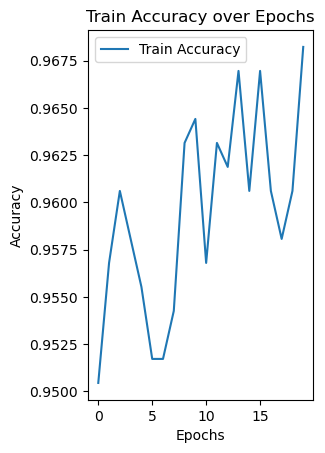

In [66]:
# for neural network
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Train Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

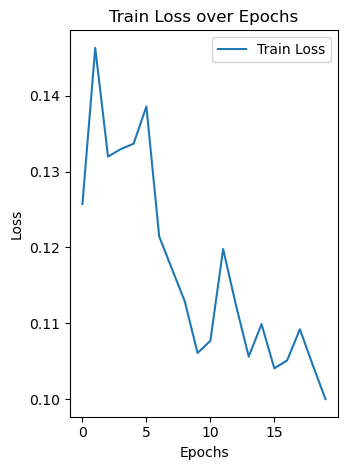

In [67]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Train Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()